In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from deap import base, creator, tools, algorithms
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("breast_cancer_new.csv" )
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#Identify missing values
missing_data = df.isnull()
missing_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [10]:
## M = Malignant(+ve), B = Benign
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [12]:
df = df.drop(["Unnamed: 32","id"],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
#shift colum to last
column_to_move = 'diagnosis'
column_values = df.pop(column_to_move)
df[column_to_move] = column_values
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
#labeling encoding where M=1 and B=0
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['diagnosis'] = enc.fit_transform(df['diagnosis'])
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [53]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [55]:
#Assuming that my last column is target variable.
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
print("X:\n",X)
print("y:\n",y)

X:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
y:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 

In [59]:
#encode traget variable if it's categorical 
y = pd.factorize(y)[0]
y = to_categorical(y)
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [61]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455, 2)
(114, 30)
(114, 2)


In [65]:
# Define the neural network model
def create_model(input_dim, dropout_rate=0.5):
  
    model = Sequential()
    model.add(Input(shape=(input_dim,)))  #add input layer
    model.add(Dense(128,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [67]:
# Define the fitness function for the genetic algorithm
def fitness_function(individual):
    dropout_rate = individual[0]
    dropout_rate = max(0.01, min(0.5, dropout_rate))
    model = create_model(X_train.shape[1], dropout_rate)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy,

In [69]:
# Set up the genetic algorithm
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register('attr_float', np.random.uniform, 0.1, 0.5)
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

toolbox.register('mate', tools.cxBlend, alpha=0.5)

def mutate(individual):
    mutated_individual = tools.mutGaussian(individual, mu=0, sigma=0.1, indpb=0.2)[0]
    mutated_individual[0] = max(0.01, min(0.5, mutated_individual[0])) #Clip the value
    return mutated_individual,

toolbox.register('mutate', mutate)

toolbox.register('select', tools.selTournament, tournsize=3)
toolbox.register('evaluate', fitness_function)

In [71]:
# Run the genetic algorithm
population = toolbox.population(n=100)
ngen = 10
cxpb = 0.5
mutpb = 0.2
algorithms.eaSimple(population, toolbox, cxpb, mutpb ,ngen,  verbose=True)

gen	nevals
0  	100   
1  	77    
2  	56    
3  	54    
4  	70    
5  	57    
6  	70    
7  	65    
8  	60    
9  	58    
10 	60    


([[0.2697254846609043],
  [0.5028906429300086],
  [0.48691362139493666],
  [0.24019216640314936],
  [0.20073661103126988],
  [0.17005873004900263],
  [0.21016477679764917],
  [0.21016477679764917],
  [0.17887459335651165],
  [0.4697463303014619],
  [0.4573559033003237],
  [0.3042685990097438],
  [0.20776269309419518],
  [0.21016477679764917],
  [0.19937897485489975],
  [0.17141636622537276],
  [0.3054942450637816],
  [0.23661052027894852],
  [0.34900154839548003],
  [0.35116181445260675],
  [0.4164686321382715],
  [0.18907865265408155],
  [0.16063056428262334],
  [0.488785350698991],
  [0.41881900988089965],
  [0.4521252311850297],
  [0.2257014916337312],
  [0.42204473097875395],
  [0.34624369666810095],
  [0.21016477679764917],
  [0.4083456750116798],
  [0.34057736958043094],
  [0.21016477679764917],
  [0.21016477679764917],
  [0.48691362139493666],
  [0.22011218994347964],
  [0.21016477679764917],
  [0.38490985122440263],
  [0.4544756089276578],
  [0.3567143125850858],
  [0.148910882

In [82]:
# Extract the best individual
best_individual = tools.selBest(population, k=1)[0]
best_dropout_rate = best_individual[0]
print(f"Best Dropout Rate: {best_dropout_rate}")

Best Dropout Rate: 0.24019216640314936


In [84]:
# Train the final model with the best dropout rate
final_model = create_model(X_train.shape[1], best_dropout_rate)
final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8121 - loss: 0.4438 
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9412 - loss: 0.1728 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.1052 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0769 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9654 - loss: 0.1163 
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9820 - loss: 0.0636 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0494 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9778 - loss: 0.0749
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9805 - loss: 0.0696 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0506 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9794 - loss: 0.0561 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0

In [86]:
# Evaluate the model
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(confusion_matrix(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



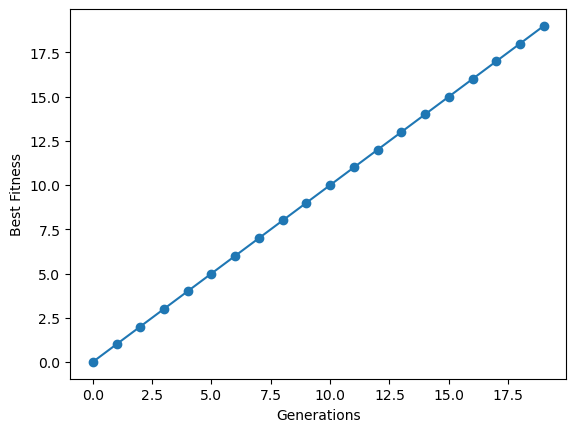

In [98]:
  import matplotlib.pyplot as plt

# Example of correct indentation
generations = 20
best_fitness = [i for i in range(generations)]  # Example data

plt.plot(range(generations), best_fitness, marker='o', linestyle='-')
plt.xlabel("Generations")
plt.ylabel("Best Fitness")
plt.show()

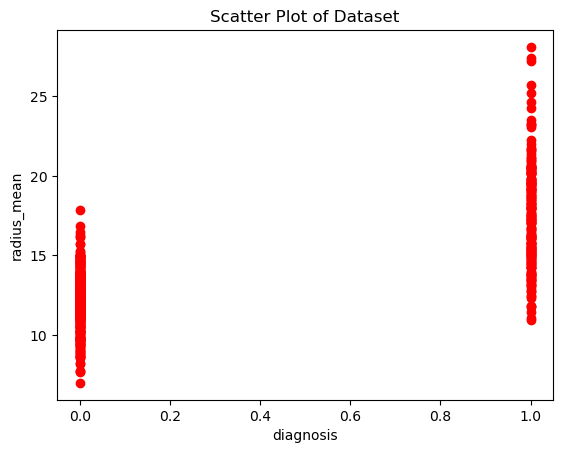

In [100]:
# Scatter plot of two columns
plt.scatter(df["diagnosis"], df["radius_mean"], color="red", marker="o")
plt.xlabel("diagnosis")
plt.ylabel("radius_mean")
plt.title("Scatter Plot of Dataset")
plt.show()

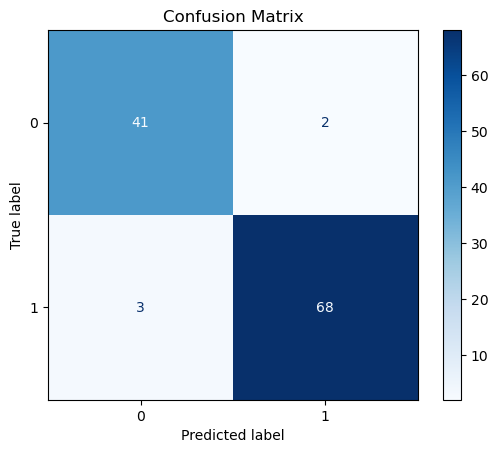

In [170]:
# Confusion Matrix for classification
if y_categorical.shape[1] > 1:  # Check if classification problem
    y_test_labels = np.argmax(y_test, axis=1)
    y_pred_labels = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_test_labels, y_pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    
    plt.savefig("C:/Users/Acer/Documents/Confusion Matrix.png", dpi=300, bbox_inches="tight")
    plt.show()

In [172]:
print("Number of selected features:", X_test.shape[1])

Number of selected features: 30
